In [1]:
from IPython.display import Image

# Chapter 6 | 지도 학습: 분류

## 1차원 입력 2클래스 분류

입력 정보가 1차원이고, 분류할 클래스가 두 가지

### 문제 설정

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#인공데이터 만들기

np.random.seed(seed = 0)
X_min = 0
X_max = 2.5
X_n = 30
X_col = ['cornflowerblue', 'gray']

X = np.zeros(X_n)
T = np.zeros(X_n, dtype=np.uint8)

Dist_s = [0.4, 0.8] # 분포의 시작 지점
Dist_w = [0.8, 1.6] # 분포의 폭
Pi = 0.5 # 클래스 0의 비율

for n in range(X_n):
    wk = np.random.rand()
    #print(wk)
    T[n] = 0*(wk<Pi) + 1*(wk>=Pi) # 성별
    #print(wk<Pi)
    X[n] = Dist_s[T[n]] + np.random.rand() * Dist_w[T[n]] # 몸무게
    

print('X='+str(np.round(X,2)))
print('T='+str(T))

X=[1.94 1.67 0.92 1.11 1.41 1.65 2.28 0.47 1.07 2.19 2.08 1.02 0.91 1.16
 1.46 1.02 0.85 0.89 1.79 1.89 0.75 0.9  1.87 0.5  0.69 1.5  0.96 0.53
 1.21 0.6 ]
T=[1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0]


In [4]:
def show_data1(x, t):
    K = np.max(t) + 1
    for k in range(K):
        plt.plot(x[t==k], t[t==k], color = X_col[k], alpha = 0.5,
                 linestyle ='none', marker='o')
        plt.grid(True)
        plt.ylim(-.5, 1.5)
        plt.xlim(X_min, X_max)
        plt.yticks([0,1])

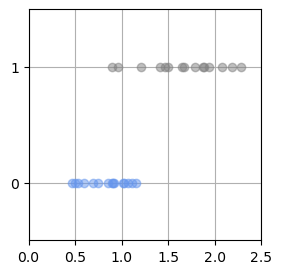

In [5]:
fig = plt.figure(figsize=(3,3))
show_data1(X, T)

### 확률로 나타내는 클래스 분류

### 최대가능도법 (Maximum Likelihood Estimation, MLE)

### 로지스틱 회귀 모델 (Logistic Regression Model)

In [6]:
def logistic(w, x):
    y = 1 / (1 + np.exp(-(w[0]*x+w[1])))
    return y

In [7]:
def show_logistic(w):
    xb = np.linspace(X_min, X_max, 100)
    y = logistic(w, xb)
    plt.plot(xb, y, color='gray',linewidth=4)
    
    #결정경계 y == 0.5
    i = np.min(np.where(y > 0.5))
    # y는 i가 0.5를 넘은 직후의 요소 번호
    print(i)
    B = (xb[i-1]+xb[i]) / 2
    # B는 y가 0.5를 넘은 직후(xb[i])와, 그 직전의 xb[i-1]의 평균이 결정 경계의 근사치로서 B에 저장된다. 
    print(xb[i-1])
    print(xb[i])
    print(B)
    plt.plot([B,B], [-.5, 1.5], color = 'k', linestyle = '--')
    plt.grid(True)
    return B

    

50
1.2373737373737375
1.2626262626262625
1.25


1.25

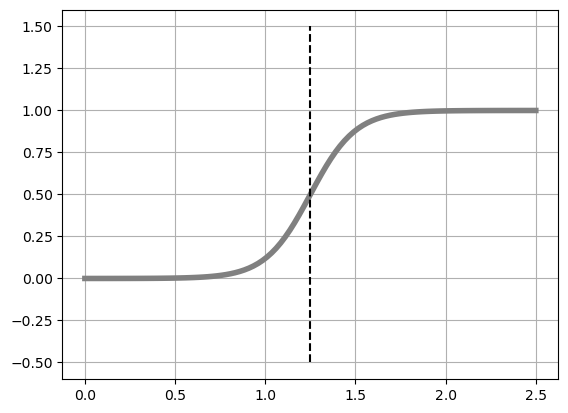

In [8]:
W = [8, -10]
show_logistic(W)

### 교차 엔트로피 오차

**cross-entropy function** **[cee]**
$$ E(\mathbf{w}) = - \frac{1}{N}\log P(\mathbf{T}|\mathbf{X}) = - \frac{1}{N}\sum_{n=0}^{N-1}\left\{t_n\log y_n + (1-t_n)\log (1-y_n) \right\}$$

In [9]:
def cee_logistic(w, x, t):
    y = logistic(w, x)
    cee = 0
    for n in range(len(y)):
        cee = cee -(t[n]*np.log(y[n])+(1-t[n])*np.log(1-y[n]))
        #print(cee)
    cee = cee / X_n
    return cee

In [10]:
W = [1,1]
cee_logistic(W, X, T)

1.0288191541851066

In [11]:
# 평균 교차 엔트로피 오차가 어떤 모양일까?

xn = 80
w_range = np.array([[0,15],[-15,0]])
x0 = np.linspace(w_range[0,0], w_range[0,1], xn)
x1 = np.linspace(w_range[1,0], w_range[1,1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
C = np.zeros((len(x1), len(x0)) )
w = np.zeros(2)

for i0 in range(xn):
    for i1 in range(xn):
        w[0] = x0[i0]
        w[1] = x1[i1]
        C[i1, i0] = cee_logistic(w, X, T)

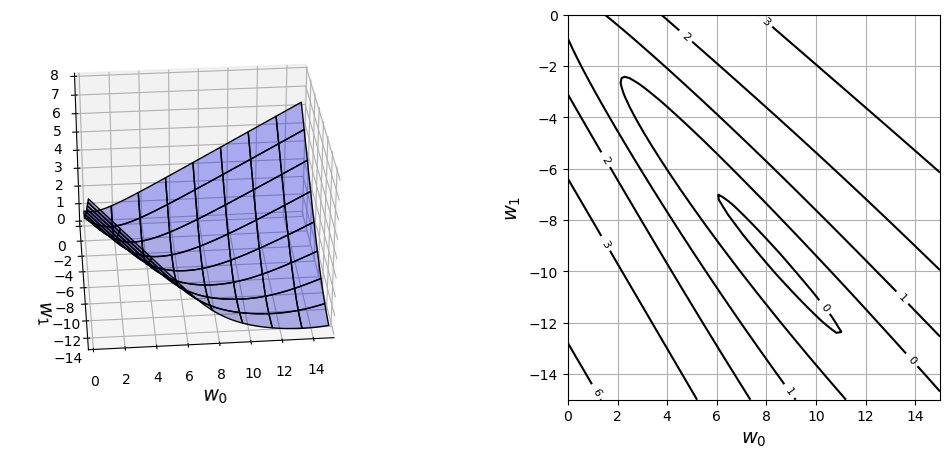

In [12]:
plt.figure(figsize=(12, 5))
plt.subplots_adjust(wspace = 0.5)
ax = plt.subplot(1, 2, 1, projection = '3d')
ax.plot_surface(xx0, xx1, C, color='b', edgecolor='k', rstride=10, cstride=10, alpha=0.3)
ax.set_xlabel('$w_0$', fontsize=14)
ax.set_ylabel('$w_1$', fontsize=14)
ax.set_xlim(0, 15)
ax.set_ylim(-15, 0)
ax.set_zlim(0, 8)
ax.view_init(30, -95)

plt.subplot(1, 2, 2)
cont = plt.contour(xx0, xx1, C, 20, colors='k', levels = [0.26, 0.4, 0.8, 1.6, 3.2, 6.4])
cont.clabel(fmt = '%1.f', fontsize=8)
plt.xlabel('$w_0$', fontsize=14)
plt.ylabel('$w_1$', fontsize = 14)
plt.grid(True)




### 학습 규칙의 도출 (경사하강법 사용)

$$ E(\mathbf{w}) = \frac{1}{N}\sum_{n=0}^{N-1}E_n(\mathbf{w})$$
$$ E_n(\mathbf{w}) = -t_n\log y_n - (1-t_n)\log (1-y_n) $$

$$ E(\mathbf{w})\ 를\ w_0 에\ 대해서\ 편미분하기 $$

$$ 그런데,$$

$$ y_n = \sigma (a_n) = \frac{1}{1+exp(-a_n)} $$

$$ a_n = w_0 x_n + w_1 $$

$$ \therefore \frac{\partial E_n}{\partial w_0} = \frac{\partial E_n}{\partial y_n} \cdot \frac{\partial y_n}{\partial a_n} \cdot \frac{\partial a_n}{\partial w_0} = x_n(y_n - t_n)$$

$$ 같은\ 방법으로 \ w_1 도\ 계산하면, $$

$$ \frac{\partial E_n}{\partial w_1} = (y_n - t_n) $$

$$ 특정\ 값인\ E_n\ 아니라\ 전체\ 합인 E에\ 대해\ 시그마를\ 사용해서\ 나타내면,\ $$

$$ \frac{\partial E}{\partial w_0} =  \frac{1}{N}\sum_{n=0}^{N-1}(y_n-t_n)x_n $$
$$ \frac{\partial E}{\partial w_1} =  \frac{1}{N}\sum_{n=0}^{N-1}(y_n-t_n) $$

In [13]:
def dcee_logistic(w, x, t):
    y = logistic(w, x)
    dcee = np.zeros(2)
    for n in range(len(y)):
        dcee[0] = dcee[0] + (y[n] -t[n])*x[n]
        dcee[1] = dcee[1] + (y[n] -t[n])
        
    dcee = dcee / X_n
    
    return dcee

In [14]:
W = [1,1]
dcee_logistic(W,X,T)

array([0.30857905, 0.39485474])

### 경사 하강법에 의한 해

In [15]:
from scipy.optimize import minimize

In [16]:
def fit_logistic(w_init, x, t):
    res1 = minimize(cee_logistic, w_init, args=(x,t), 
                   jac = dcee_logistic, method = 'CG')
    #minimize(fun, x0, args=(), jac, method=)
    #fun = objective function .... fun(x, *args) 맨 앞에 들어가는 변수가 우리가 구하고 싶은 매개변수자리임.
    #우리는 여기서 W를 보고 싶으므로 w_init 이 앞에 와야해. 그래서 위에서 cee_logistic 함수 선언할 때
    #cee_logistic(w, x, t) 순으로 변수를 넣은 거임.
    # w를 제외한 x,t는 뒤으 *args 자리에 들어가면 됨. 
    # jac = Method for computing the gradient vector
    #method = 'CG' -> conjucate gradient
    
    return res1.x

w0 = 8.18, w1 = -9.38
46
1.1363636363636362
1.1616161616161615
1.1489898989898988
CEE = 1.15 g


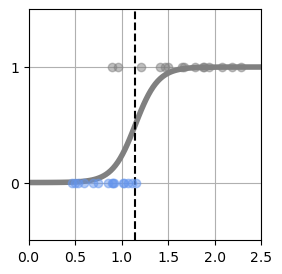

In [17]:
plt.figure(1, figsize=(3,3))
W_init = [1,-1]
W = fit_logistic(W_init, X, T)
print("w0 = {0:.2f}, w1 = {1:.2f}".format(W[0], W[1]))

B = show_logistic(W)
show_data1(X,T)
plt.ylim(-.5, 1.5)
plt.xlim(X_min, X_max)
cee = cee_logistic(X,W,T)
print("CEE = {0:.2f} g". format(B))
plt.show()



## 2차원 입력 2클래스 분류

### 문제 설정

In [18]:
#데이터 새로 만들기
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
np.random.seed(seed=1)
N = 100 # the number of data
K = 3 # the number of distribution
T3 = np.zeros((N,3),dtype = np.uint8)
T2 = np.zeros((N,2),dtype = np.uint8)

X = np.zeros((N,2))
X_range0 = [-3, 3]
X_range1 = [-3, 3]

Mu = np.array([[-.5,-.5],[-.5,1.0],[1,-.5]]) #the center of a distribution
Sig = np.array([[.7,.7], [.8,.3], [.3,.8]]) #the variance of a distribution
Pi = np.array([0.4, 0.8, 1]) # the ratio for each distribution / the probability to be classified into a specific class

In [21]:
for n in range(N):
    wk = np.random.rand()

    for k in range(K):
        if wk < Pi[k]:
            # if wk is less than Pi[k]
            # T3 [n,k] = 1
            # otherwise, T3[n,k] = 0 as it is.
            T3[n, k] = 1
            break
            
    for k in range(2):
        X[n,k] = (np.random.randn() * Sig[T3[n,:] == 1, k] + Mu[T3[n,:] == 1, k])
        # n = 3, k = 0 일때,
        # T3[3,:] == 1  
        # [False, True, False]
        #그러면 Sig[T3[3,:]==1, 0] = Sig[[F,T,F],0] = Sig[1,0] = 0.8        
        
        # n = 4, k = 1 일때,
        # T3[4,:] == 1 
        # [True, False, False]
        #그러면 Sig[T3[4,:]==1,1] = Sig[[T,F,F],1] = Sig[0,0] = 0.7
        
T2[:,0] = T3[:,0]
T2[:,1] = T3[:,1] | T3[:,2] # either or both of the two entry from T3 = 1 , then T2[:,1] = 1 as well.

In [22]:
print(X[:5,:])

[[-1.14173827  0.86533666]
 [-0.86972023 -1.25107804]
 [-2.15442802  0.29474174]
 [-0.24476872  0.92518889]
 [-1.10193462  0.74082534]]


In [23]:
print(T2[:5,:])

[[0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]]


In [24]:
print(T3[:5,:])

[[0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]]


In [25]:
# Visualize T2 and T3
def show_data2(x,t):
    wk, K = t.shape
    c = [[.5,.5,.5],[1,1,1],[0,0,0]]
    for k in range(K):
        plt.plot(x[t[:,k] == 1,0], x[t[:,k] == 1,1],
            linestyle = 'none', markeredgecolor ='k',
            marker = 'o', color = c[k], alpha= 0.8)
        #T2, T3 은 같은 row일때 여러 column 중 하나만 1 임
        # ex T2의 n번째 row에서 (T2[n,0]=0 이 이면 T2[n,1] = 1이다.)
        # 즉, T2[n,:]를 찍어보면 1,0  or  0,1 만 반복되어있음.
        # T3은 1,0,0  or   0,1,0   or  0,0,1
        # 왜냐하면 class 0, 1, (+2) 중 하나에 속하기 때문임.
        # n번째 열이 class 0에 속하면 column 0 = 1 이 되고 나머지 column은 0의 값을 갖게 됨. (그래서 1,0 또는 0,1 만 반복되는 것.)
        # 따라서 각 column 이 1 이 되는 (t[:,k]==1 ) 걸 찍으면 각 class 에 속하는 점을 찍을 수 있게 된다. 
    plt.grid(True)

(-3.0, 3.0)

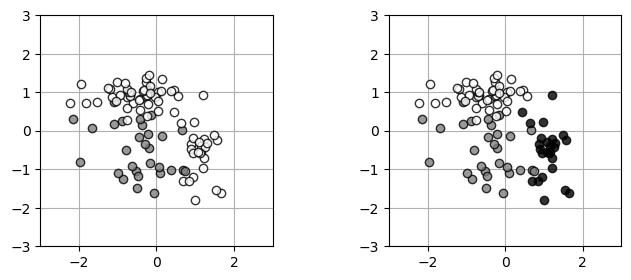

In [26]:
plt.figure(figsize=(7.5,3))
plt.subplots_adjust(wspace = 0.5)
plt.subplot(1,2,1)
show_data2(X, T2)
plt.xlim(X_range0)
plt.ylim(X_range1)

plt.subplot(1,2,2)
show_data2(X, T3)
plt.xlim(X_range0)
plt.ylim(X_range1)

### 로지스틱 회귀 모델

$$ y = \sigma(a) $$ 

$$ a = w_0x_0 + w_1x_1 + w_2 $$

At this time, let's approximate the probability of y to be classified into 0. $P(t=0|\mathbf{x})$

$ y = \sigma(a) = \frac{1}{1+exp(-a)} \longrightarrow P(t=0|\mathbf{x}) $

$ 1 - y \longrightarrow P(t=1|\mathbf{x}) $

In [27]:
def logistic2(x0, x1, w):
    y = 1 / (1+np.exp(-(w[0]*x0 + w[1]*x1 + w[2])))
    return y

In [28]:
from mpl_toolkits.mplot3d import axes3d

In [29]:
def show3d_logistic2(ax, w):
    xn = 50
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    
    y = logistic2(xx0, xx1, w)
    ax.plot_surface(xx0, xx1, y, color = 'b', edgecolor='gray',
                   rstride = 5, cstride = 5, alpha = 0.3)

In [30]:
def show_data2_3d(ax, x, t):
    c = [[.5,.5,.5],[1,1,1]]
    for i in range(2):
        ax.plot(x[t[:,i] == 1, 0], x[t[:,i] == 1, 1], 1-i,
                #As aforementioned, we are interested in the approximating the probability of y to be classified into 0.
                #if t[:,0] == 1, it shows what classified into "class 0".
                #Those points will get the probability of 1 (1-i = 1-0) to be classified into "class 0" .
                # 클래스 0 으로 분류될 확률이 1이 됨.
                # On the other hand, if t[:,1] == 1, it shows what classified into "class 1".
                # Those points will get the probability of 0 (1-i = 1-1) to be classified into "class 0".
                # 클래스 0으로 분류될 확률이 0이 됨.
                marker = 'o', color=c[i], markeredgecolor='k',
                linestyle = 'none', markersize = 5, alpha = 0.8)
    Ax.view_init(elev=25, azim=-30)

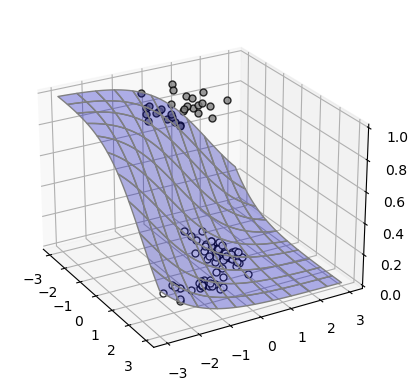

In [31]:
Ax = plt.subplot(1,1,1,projection = '3d')
W = [-1,-1,-1]
show3d_logistic2(Ax, W)
show_data2_3d(Ax, X, T2)

In [32]:
def show_contour_logistic2(w):
    xn = 30
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    y = logistic2(xx0, xx1, w)
    cont = plt.contour(xx0, xx1, y, levels=(0.2, 0.5, 0.8),
                      colors = ['k', 'cornflowerblue','k'])
    cont.clabel(fmt = '%1.1f', fontsize=10)
    plt.grid(True)
    

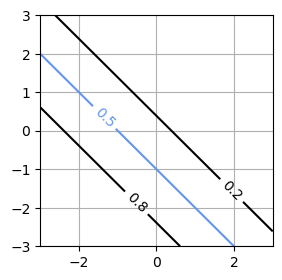

In [33]:
plt.figure(figsize=(3,3))
W = [-1,-1,-1]
show_contour_logistic2(W)

$$ E(\mathbf{w}) = -\frac{1}{N}\log P(\mathbf{T|X}) = - \frac{1}{N}\sum_{n=0}^{N-1}\left\{t_n\log y_n + (1-t_n)\log (1-y_n) \right\}$$

We will use above formula for the model's mean cross-entropy error function

In [34]:
def cee_logistic2(w, x, t):
    X_n = x.shape[0]
    y = logistic2(x[:,0],x[:,1], w)
    cee = 0
    for n in range(len(y)):
        #t[n,0] : show whether the class of nth entry is "zero" or not 
        #t[n,1] : show whether the class of nth entry is "one" of not
        #As aforementioned, we want to approximate the probability of y to be classified into "zero",
        # we just need to substitute t[n,0] for t_n
        cee = cee - (t[n,0]*np.log(y[n]) + 
                    (1-t[n,0])*np.log(1-y[n]))
    cee = cee / X_n
    return cee

$$ \frac{\partial E}{\partial w_0} =  \frac{1}{N}\sum_{n=0}^{N-1}(y_n-t_n)x_0 $$
$$ \frac{\partial E}{\partial w_1} =  \frac{1}{N}\sum_{n=0}^{N-1}(y_n-t_n)x_1 $$
$$ \frac{\partial E}{\partial w_2} =  \frac{1}{N}\sum_{n=0}^{N-1}(y_n-t_n) $$

In [35]:
def dcee_logistic2(w, x, t):
    X_n = x.shape[0]
    y = logistic2(x[:,0], x[:,1], w)
    dcee = np.zeros(3)
    for n in range(len(y)):
        dcee[0] = dcee[0] + (y[n] - t[n,0]) * x[n,0]
        dcee[1] = dcee[1] + (y[n] - t[n,0]) * x[n,1]
        dcee[2] = dcee[2] + (y[n] - t[n,0])
    
    dcee = dcee  / X_n
    return dcee

In [36]:
W = [-1,-1,-1]
dcee_logistic2(W, X, T2)

array([ 0.01816735,  0.09092783, -0.01057338])

Finally, we will get the parameters $w$ that minimize cee and visualize the results.

In [37]:
from scipy.optimize import minimize

In [38]:
def fit_logistic2(w_init, x, t):
    res = minimize(cee_logistic2, w_init, args = (x,t),
                  jac = dcee_logistic2, method = "CG")
    return res.x


w0 = -2.06, w1 = -2.53, w2 = -1.18
CEE = 0.36


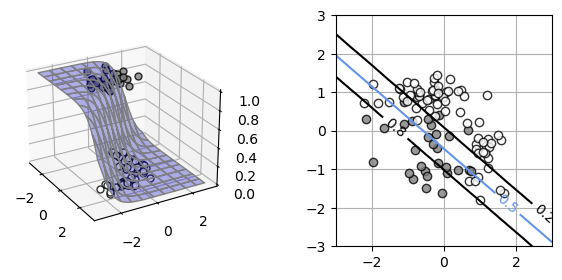

In [39]:
plt.figure(1, figsize=(7, 3))
plt.subplots_adjust(wspace=0.5)

Ax = plt.subplot(1,2,1, projection = '3d')
W_init = [-1,0,0]
W = fit_logistic2(W_init, X, T2)
print("w0 = {0:.2f}, w1 = {1:.2f}, w2 = {2:.2f}".format(W[0],W[1],W[2]))

show3d_logistic2(Ax, W)
show_data2_3d(Ax, X, T2)

cee = cee_logistic2(W, X, T2)
print("CEE = {0:.2f}".format(cee))

Ax = plt.subplot(1,2,2)
show_data2(X, T2)
show_contour_logistic2(W)


## 2차원 입력 3클래스 분류

### 3클래스 분류 로지스틱 회귀 모델

Softmax function can be applied to multi-class classification

$$ a_k = w_{k0}x_0 + w_{k1}x_1 + w_{k2} \qquad(k = 0,1,2) $$

But let's assume that there is $x_2$, which always get a value of 1.

$$ a_k = w_{k0}x_0 + w_{k1}x_1 + w_{k2}x_2 = \sum_{i=0}^{D}w_{ki}x_i \quad(k = 0,1,2)$$

$$u = exp(a_0) + exp(a_1) + exp(a_2) = \sum_{k=0}^{K-1}exp(a_k)$$

K indicates the number of class, herein K = 3

$$ y_k = \frac{exp(a_k)}{u} \qquad(k = 0,1,2) $$

The input of the model is $ x = [x_0, x_1, x_2] $, but $x_2$ is always dummpy input with a value of **1** .      
The output of the model is $ y = [y_0, y_1, y_2] $, always guarantee $ y_0 + y_1 +y_2 = 1 $.  
The parameter of the model is $w_{ki}\ \ (k=0,1,2,\ i=0,1,2) $  

#### Description for logistic3 function

![logistic3_description](6-3-1-logistic3_func_description.png)

In [40]:
#Please refer to the description above.
def logistic3(x0, x1, w):
    K = 3
    w = w.reshape((3,3))
    n = len(x1)
    y = np.zeros((n,K))
    
    for k in range(K):
        
        y[:,k] = np.exp(w[k,0]*x0 + w[k,1]*x1 + w[k,2])
        #print(f"y[:,k] : {y[:,k]}")
    #print(f"y : {y}")    
    
    wk = np.sum(y, axis = 1)
    #print(f"wk : {wk}")
    
    wk = y.T / wk
    #print(f"again wk: {wk}")
    y = wk.T
    #print(f"y : {y}")
    return y

In [41]:
#test
W = np.array([1,2,3,4,5,6,7,8,9])
# or W = np.array([x for x in range(1,9+1)])
y = logistic3(X[:3,0], X[:3,1], W)
print(np.round(y, 3))

[[0.012 0.101 0.887]
 [0.965 0.033 0.001]
 [0.925 0.07  0.005]]


### 교차 엔트로피 오차

$$ P(\mathbf{T|X}) = \prod_{n=0}^{N-1}P(t_n|\mathbf{w}) = \prod_{n=0}^{N-1}y_{n0}^{t_{n0}}y_{n1}^{t_{n1}}y_{n2}^{t_{n2}} = \prod_{n=0}^{N-1}\prod_{k=0}^{K-1}y_{nk}^{t_{nk}}$$

$$ E(\mathbf{W}) = -\frac{1}{N}\log P(\mathbf{T|X}) = - \frac{1}{N}\sum_{n=0}^{N-1}P(t_n|x_n) = -\frac{1}{N}\sum_{n=0}^{N-1}\sum_{k=0}^{K-1}t_{nk}\log{y_{nk}} $$

In [42]:
def cee_logistic3(w, x, t):
    X_n = x.shape[0]
    y = logistic3(x[:,0],x[:,1], w)
    cee = 0
    N, K = y.shape
    
    for n in range(N):
        for k in range(K):
            cee = cee - (t[n,k]*np.log(y[n,k]))
    cee = cee / X_n
    return cee

In [43]:
W = np.array([1,2,3,4,5,6,7,8,9])
cee_logistic3(W, X, T3)

2.7268962169764843

### 경사 하강법에 의한 해

$$ \frac{\partial E}{\partial w_{ki}} =  \frac{1}{N}\sum_{n=0}^{N-1}(y_{nk}-t_{nk})x_i $$

In [44]:
def dcee_logistic3(w, x, t):
    X_n = x.shape[0]
    y = logistic3(x[:,0],x[:,1], w)
    dcee = np.zeros((3,3)) # (the number of class = 3) * (the dimension of x +1 =3)
    N, K = y.shape
    for n in range(N):
        for k in range(K):
            dcee[k,:] = dcee[k,:] - (t[n,k] - y[n,k])*np.r_[x[n,:],1] 
            # X is 2-D array, but we introduce dummy x2, which always gets a value of 1.
            # Therefore, we stack 1 next to (horizontally) x[n,:] by using np.r_() 
    dcee = dcee / X_n
    return dcee.reshape(-1)

In [45]:
W = np.array([1,2,3,4,5,6,7,8,9])
dcee_logistic3(W, X, T3)

array([ 0.0075177 ,  0.04880809, -0.16887493,  0.20269827, -0.42975087,
       -0.36601811, -0.21021597,  0.38094277,  0.53489304])

In [46]:
def fit_logistic3(w_init, x, t):
    res = minimize(cee_logistic3, w_init, args=(x,t), 
                  jac = dcee_logistic3, method = 'CG')
    return res.x

In [47]:
def show_contour_logistic3(w):
    xn = 30
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    
    xx0, xx1 = np.meshgrid(x0, x1)
    y = np.zeros((xn, xn, 3))
    for i in range(xn):
        wk = logistic3(xx0[:,i], xx1[:,i], w)
        #wk.shape = (30,3)
        for j in range(3):
            y[:,i,j] = wk[:,j]

    for j in range(3):
        cont = plt.contour(xx0, xx1, y[:,:,j],
                          levels = (0.5,0.9),
                          colors = ['cornflowerblue','k'])
        cont.clabel(fmt='%1.1f', fontsize=9)
    plt.grid(True)

In [48]:
x0 = np.linspace(X_range0[0], X_range0[1], 30)
x1 = np.linspace(X_range1[0], X_range1[1], 30)
xx0, xx1 = np.meshgrid(x0, x1)
xx1[:,0]

array([-3.        , -2.79310345, -2.5862069 , -2.37931034, -2.17241379,
       -1.96551724, -1.75862069, -1.55172414, -1.34482759, -1.13793103,
       -0.93103448, -0.72413793, -0.51724138, -0.31034483, -0.10344828,
        0.10344828,  0.31034483,  0.51724138,  0.72413793,  0.93103448,
        1.13793103,  1.34482759,  1.55172414,  1.75862069,  1.96551724,
        2.17241379,  2.37931034,  2.5862069 ,  2.79310345,  3.        ])

In [49]:
xx0[:,0]

array([-3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3.,
       -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3.,
       -3., -3., -3., -3.])

[[-3.47 -2.85  2.81]
 [-3.35  4.15 -0.19]
 [ 6.82 -1.31 -2.63]]
CEE = 0.20


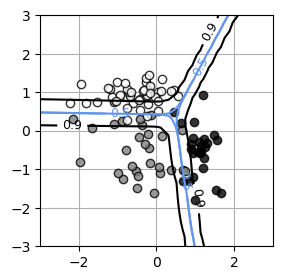

In [50]:
W_init = np.zeros((3,3))
W = fit_logistic3(W_init, X, T3)
print(np.round(W.reshape((3,3)),2))
cee = cee_logistic3(W, X, T3)
print("CEE = {0:.2f}".format(cee))

plt.figure(figsize=(3,3))
show_data2(X, T3)
show_contour_logistic3(W)
plt.show()